The goal of unsupervised learning is to discover the hidden patterns or structures of the data in which no target variable exists to perform either classification or regression methods. Unsupervised learning methods are often more challenging, as the outcomes are subjective and there is no simple goal for the analysis, such as predicting the class or continuous variable. These methods are performed as part of exploratory data analysis. On top of that, it can be hard to assess the results obtained from unsupervised learning methods, since there is no universally accepted mechanism for performing the validation of results.
Nonetheless, unsupervised learning methods have growing importance in various fields asa trending topic nowadays, and many researchers are actively working on them at the moment to explore this new horizon. A few good applications are:
- Genomics: Unsupervised learning applied to understanding genomic-wide biological insights from DNA to better understand diseases and peoples. These types of tasks are more exploratory in nature.
- Search engine: Search engines might choose which search results to display to a particular individual based on the click histories of other similar users.
- Knowledge extraction: To extract the taxonomies of concepts from raw text to generate the knowledge graph to create the semantic structures in the field of NLP.
- Segmentation of customers: In the banking industry, unsupervised learning like clustering is applied to group similar customers, and based on those segments,marketing departments design their contact strategies. For example, older, low-risk customers will be targeted with fixed deposit products and high-risk, younger customers will be targeted with credit cards or mutual funds, and so on.
- Social network analysis: To identify the cohesive groups of people in social networks who are more connected with each other and have similar characteristics in common.
In this topic, we will be covering the following techniques to perform unsupervised learning:
    - K-means
    - DBSCAN
    - Spectral Clustering

In [49]:
#K-Means on dummy dataset
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans


# For reproducibility
np.random.seed(1000)

nb_samples = 1000

In [50]:
def show_dataset(X):
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))

    ax.grid()
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

    ax.scatter(X[:, 0], X[:, 1], marker='o', color='b')

    plt.show()

Clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups (clusters). Clustering is commonly used to explore a dataset to either identify the underlying patterns in it or to create a group of characteristics. In the case of social networks, they can be clustered to identify communities and to suggest missing connections between people. Here are a few examples:
- In anti-money laundering measures, suspicious activities and individuals can be identified using anomaly detection 
- In biology, clustering is used to find groups of genes with similar expression patterns
- In marketing analytics, clustering is used to find segments of similar customers so that different marketing strategies can be applied to different customer segments accordingly

There are two kinds of inputs we might use. In similarity-based clustering, the input to the algorithm is an N×N dissimilarity matrix or distance matrix D. In feature-based clustering, the input to the algorithm is an N×D feature matrix or design matrix X. Similarity-based clustering has the advantage that it allows for easy inclusion of domain-specific similarity or kernel functions. Feature-based clustering has the advantage that it is applicable to “raw”, potentially noisy data. 
In addition to the two types of input, there are two possible types of output: flat clustering, also called partitional clustering, where we partition the objects into disjoint sets; and hierarchical clustering, where we create a nested tree of partitions. Not surprisingly, flat clusterings are usually faster to create (O(N D) for flat vs O(N2 logN) for hierarchical), but hierarchical clusterings are often more useful. 
Furthermore, most hierarchical clustering algorithms are deterministic and do not require the specification of K, the number of clusters, whereas most flat clustering algorithms are sensitive to the initial conditions and require some model selection method for K.

In [51]:
def show_clustered_dataset(X, km):
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))

    ax.grid()
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

    for i in range(nb_samples):
        c = km.predict(X[i].reshape(1, -1))
        if c == 0:
            ax.scatter(X[i, 0], X[i, 1], marker='o', color='r')
        elif c == 1:
            ax.scatter(X[i, 0], X[i, 1], marker='^', color='b')
        else:
            ax.scatter(X[i, 0], X[i, 1], marker='d', color='g')

    plt.show()

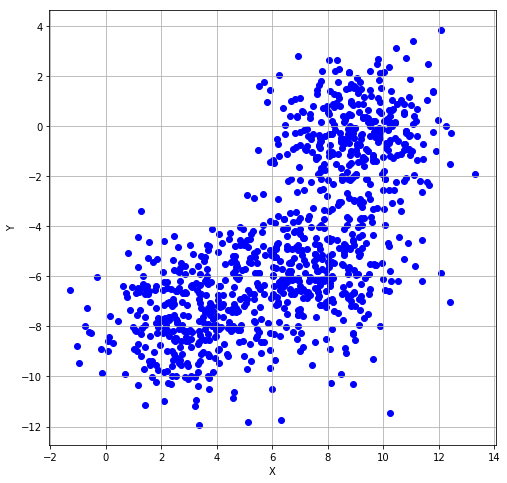

In [52]:
# Create dataset
X, _ = make_blobs(n_samples=nb_samples, n_features=2, centers=3, cluster_std=1.5, random_state=1000)

# Show dataset
show_dataset(X)

### K-means
The k-means clustering algorithm is an iterative process of moving the centers of clusters or centroids to the mean position of their constituent points, and re-assigning instances to their closest clusters iteratively until there is no significant change in the number of cluster centers possible or number of iterations reached.
The k-means algorithm is based on the (strong) initial condition to decide the number of clusters through the assignment of k initial centroids or means.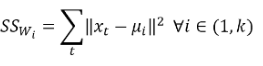

In [53]:
# Create and train K-Means
km = KMeans(n_clusters=3)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

The cost function of k-means is determined by the Euclidean distance (square-norm) between the observations belonging to that cluster with its respective centroid value. An intuitive way to understand the equation is, if there is only one cluster (k=1), then the distances between all the observations are compared with its single mean. Whereas, if, number of clusters increases to 2(k= 2), then two-means are calculated and a few of the observations are assigned to cluster 1 and other observations are assigned to cluster two-based on proximity. Subsequently, distances are calculated in cost functions by applying the same distance measure, but separately to their cluster centers. The algorithm stops when the desired tolerance is reached, or in other words, when the centroids become stable and, therefore, the inertia is minimized. Of course, this approach is quite sensitive to the initial conditions, and some methods have been studied to improve the convergence speed. One of them is called k-means++, which selects the initial centroids so that they are statistically close to the final ones.
Algorithmic steps for k-means clustering
Let  X = {x1,x2,x3,……..,xn} be the set of data points and V = {v1,v2,…….,vc} be the set of centers.
- Randomly select ‘c’ cluster centers.
- Calculate the distance between each data point and cluster centers.
- Assign the data point to the cluster center whose distance from the cluster center is minimum of all the cluster centers..
- Recalculate the new cluster center using: 
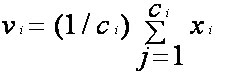
- Recalculate the distance between each data point and new obtained cluster centers.
- If no data point was reassigned then stop, otherwise repeat from step 3).

In [54]:
# Show the centroids
print(km.cluster_centers_)

[[ 9.04426519 -0.35993508]
 [ 2.98367621 -7.72269048]
 [ 7.46372318 -5.78014081]]


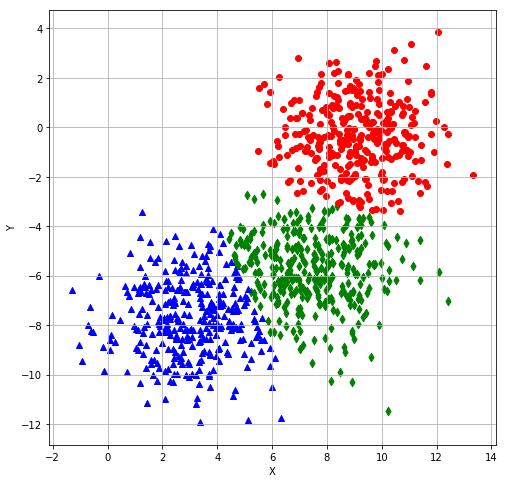

In [55]:
# Show clustered dataset
show_clustered_dataset(X, km)

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.cluster import KMeans
from scipy.spatial.distance import pdist

# For reproducibility
np.random.seed(1000)
nb_samples = 1000

In [57]:
def show_dataset(X):
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))
    ax.grid()
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

    for i in range(nb_samples):
        if Y[i] == 0:
            ax.scatter(X[i, 0], X[i, 1], marker='o', color='r')
        else:
            ax.scatter(X[i, 0], X[i, 1], marker='^', color='b')
    plt.show()

In [58]:
def show_clustered_dataset_rd(X, km):
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))

    ax.grid()
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

    for i in range(nb_samples):
        c = km.predict(X[i].reshape(1, -1))
        if c == 0:
            ax.scatter(X[i, 0], X[i, 1], marker='o', color='r')
        else:
            ax.scatter(X[i, 0], X[i, 1], marker='^', color='b')

    plt.show()

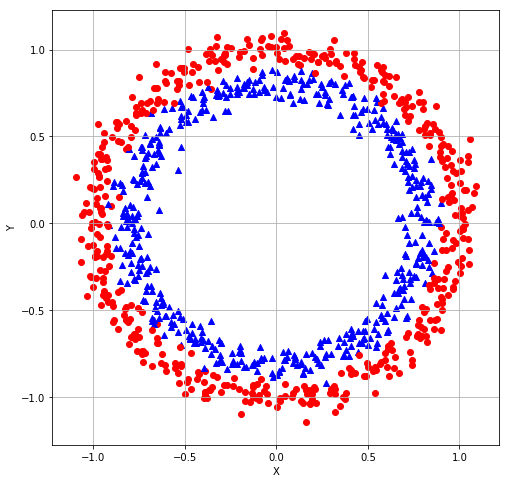

In [59]:
# Create dataset
X, Y = make_circles(n_samples=nb_samples, noise=0.05)

# Show dataset
show_dataset(X)

In [60]:
# Create and train K-Means
km = KMeans(n_clusters=2)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

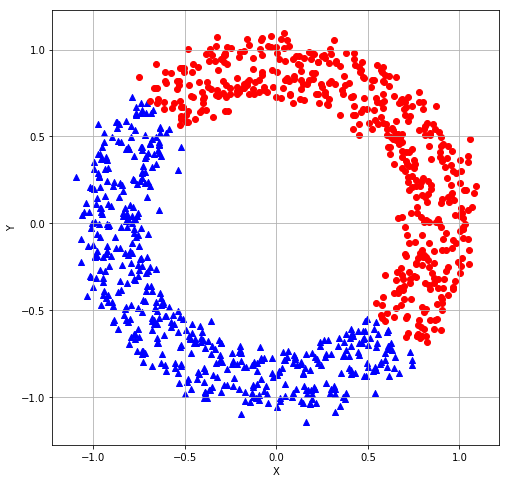

In [61]:
# Show clustered dataset
show_clustered_dataset_rd(X, km)

In [62]:
# Compute the average intra-cluster distances
Y_pred = km.predict(X)

sampled_X = np.random.choice(X[Y_pred == 0, 0], replace=False, size=300).astype(np.int32)

true_distances = pdist(X[Y == 0], metric='euclidean')
distances = pdist(X[sampled_X], metric='euclidean')

print('True average distance: %.3f' % np.mean(true_distances))
print('Clustering average distance: %.3f' % np.mean(distances))

True average distance: 1.281
Clustering average distance: 0.175


In [63]:
# Cluster Optimisation and evaluation metrics
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples, calinski_harabaz_score, \
    homogeneity_score, completeness_score, adjusted_rand_score
from sklearn.metrics.pairwise import pairwise_distances
# For reproducibility
np.random.seed(1000)
nb_samples = 1000

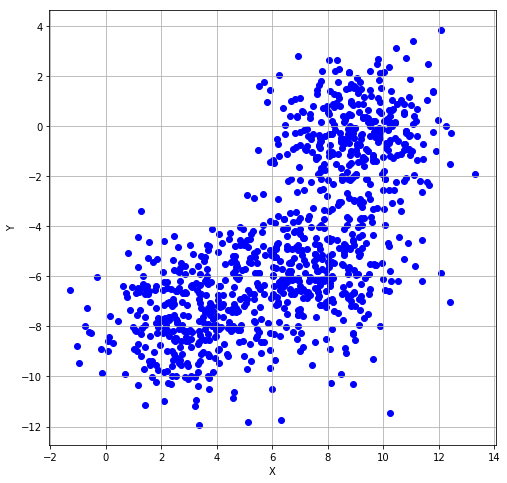

In [64]:
# Create dataset
X, _ = make_blobs(n_samples=nb_samples, n_features=2, centers=3, cluster_std=1.5, random_state=1000)

# Show the dataset
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

ax.grid()
ax.set_xlabel('X')
ax.set_ylabel('Y')

ax.scatter(X[:, 0], X[:, 1], marker='o', color='b')

plt.show()

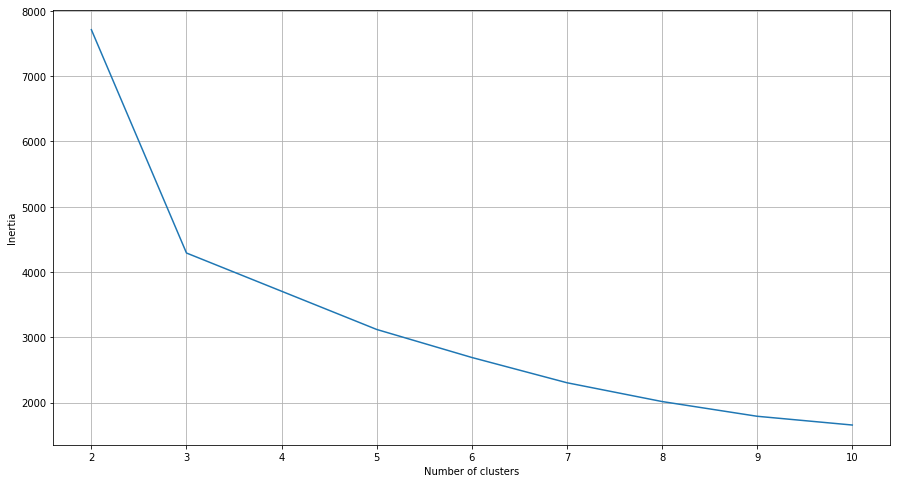

In [65]:
# Analyze the inertia
nb_clusters = [2, 3, 5, 6, 7, 8, 9, 10]

inertias = []

for n in nb_clusters:
    km = KMeans(n_clusters=n)
    km.fit(X)
    inertias.append(km.inertia_)

fig, ax = plt.subplots(figsize=(15, 8))

ax.plot(nb_clusters, inertias)
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Inertia')
ax.grid()
plt.show()

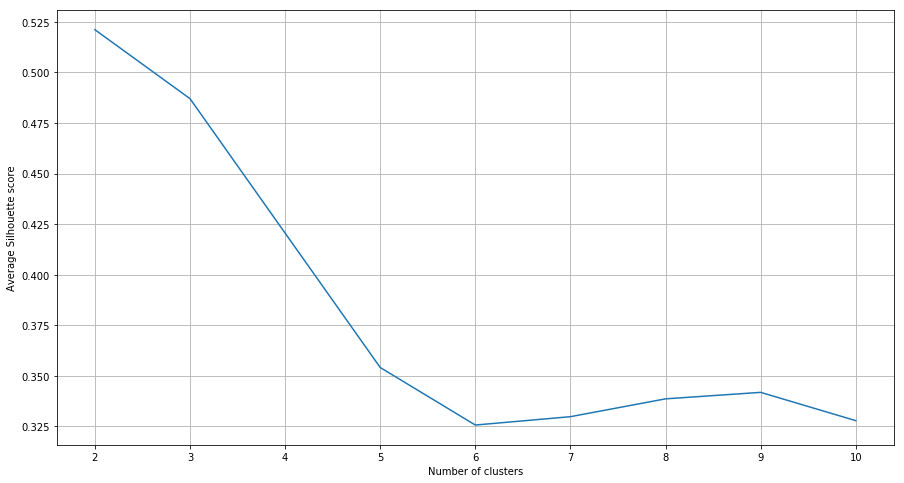

In [66]:
# Analyze the silhouette scores
avg_silhouettes = []

for n in nb_clusters:
    km = KMeans(n_clusters=n)
    Y = km.fit_predict(X)
    avg_silhouettes.append(silhouette_score(X, Y))

fig, ax = plt.subplots(figsize=(15, 8))

ax.plot(nb_clusters, avg_silhouettes)
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Average Silhouette score')
ax.grid()

plt.show()

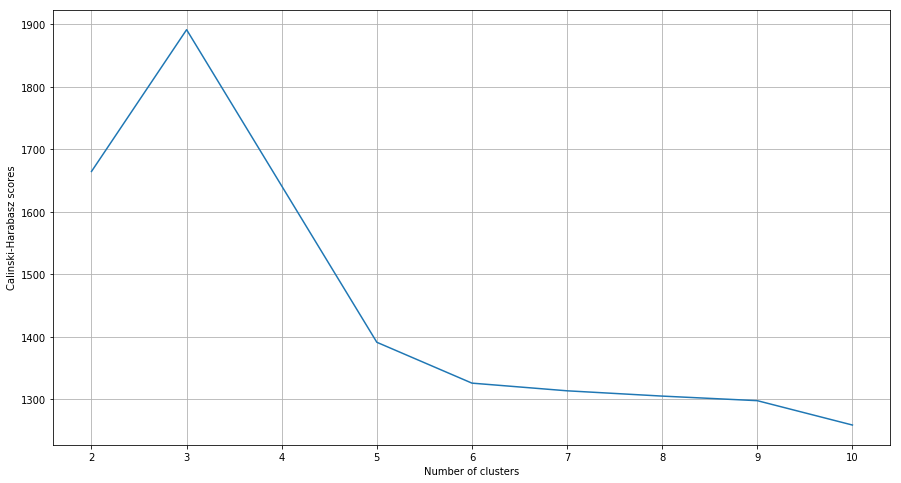

In [67]:
# Analyze the Calinski-Harabasz scores
ch_scores = []

km = KMeans(n_clusters=n)
Y = km.fit_predict(X)

for n in nb_clusters:
    km = KMeans(n_clusters=n)
    Y = km.fit_predict(X)
    ch_scores.append(calinski_harabaz_score(X, Y))

fig, ax = plt.subplots(figsize=(15, 8))

ax.plot(nb_clusters, ch_scores)
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Calinski-Harabasz scores')
ax.grid()

plt.show()

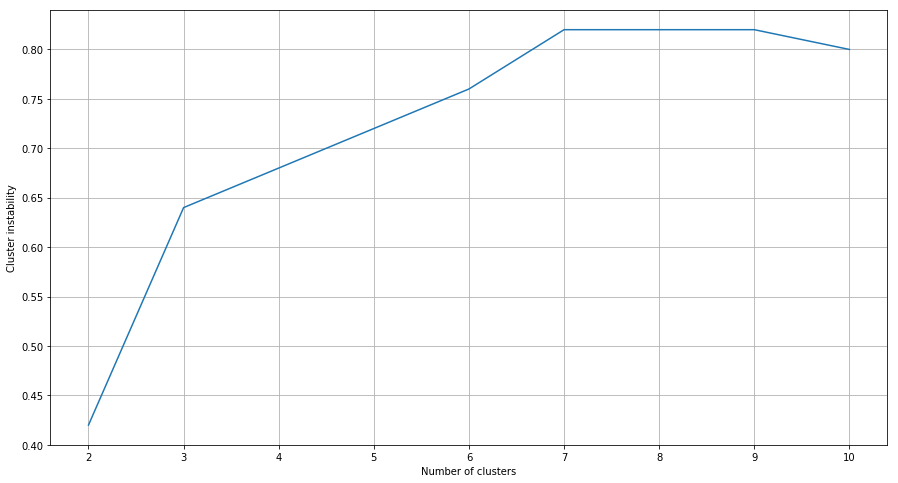

In [68]:
# Analyze the cluster instability
nb_noisy_datasets = 10

X_noise = []

for _ in range(nb_noisy_datasets):
    Xn = np.ndarray(shape=(1000, 2))

    for i, x in enumerate(X):
        if np.random.uniform(0, 1) < 0.25:
            Xn[i] = X[i] + np.random.uniform(-2.0, 2.0)
        else:
            Xn[i] = X[i]

    X_noise.append(Xn)

instabilities = []

for n in nb_clusters:
    Yn = []

    for Xn in X_noise:
        km = KMeans(n_clusters=n)
        Yn.append(km.fit_predict(Xn))

    distances = []

    for i in range(len(Yn) - 1):
        for j in range(i, len(Yn)):
            d = pairwise_distances(Yn[i].reshape(-1, 1), Yn[j].reshape(-1, 1), 'hamming')
            distances.append(d[0, 0])

    instability = (2.0 * np.sum(distances)) / float(nb_noisy_datasets ** 2)
    instabilities.append(instability)

fig, ax = plt.subplots(figsize=(15, 8))

ax.plot(nb_clusters, instabilities)
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Cluster instability')
ax.grid()

plt.show()

In [69]:
# Analyze the homegeneity, completeness, and Adjusted Rand score
km = KMeans(n_clusters=3)
Yp = km.fit_predict(X)

print('Homegeneity: %.3f' % homogeneity_score(Y, Yp))
print('Completeness: %.3f' % completeness_score(Y, Yp))
print('Adjusted Rand score: %.3f' % adjusted_rand_score(Y, Yp))

Homegeneity: 0.431
Completeness: 0.896
Adjusted Rand score: 0.333


In [70]:
#DBSCAN

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
# For reproducibility
np.random.seed(1000)
nb_samples = 1000

In [71]:
def show_dataset(X, Y):
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))
    ax.grid()
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    for i in range(nb_samples):
        if Y[i] == 0:
            ax.scatter(X[i, 0], X[i, 1], marker='o', color='r')
        else:
            ax.scatter(X[i, 0], X[i, 1], marker='^', color='b')
    plt.show()

In [72]:
def show_clustered_dataset(X, Y):
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))

    ax.grid()
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

    for i in range(nb_samples):
        if Y[i] == 0:
            ax.scatter(X[i, 0], X[i, 1], marker='o', color='r')
        else:
            ax.scatter(X[i, 0], X[i, 1], marker='^', color='b')

    plt.show()

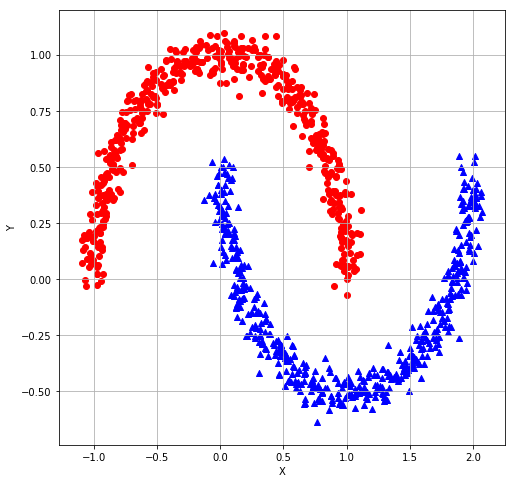

In [73]:
# Create dataset
X, Y = make_moons(n_samples=nb_samples, noise=0.05)
# Show dataset
show_dataset(X, Y)

In [74]:
# Create and train K-Means
km = KMeans(n_clusters=2)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

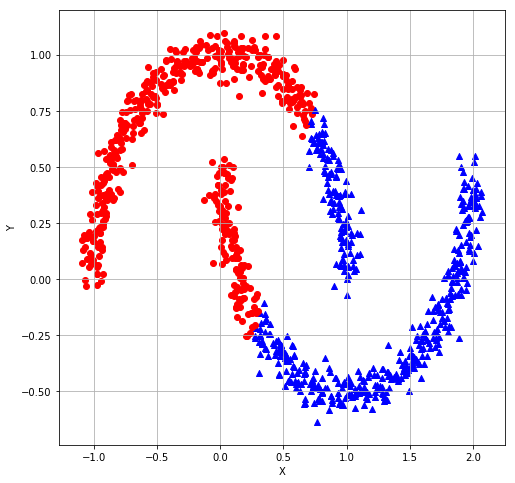

In [75]:
# Show clustered dataset
show_clustered_dataset_rd(X, km)

In [76]:
# Create and train DBSCAN
dbs = DBSCAN(eps=0.1)
Y = dbs.fit_predict(X)

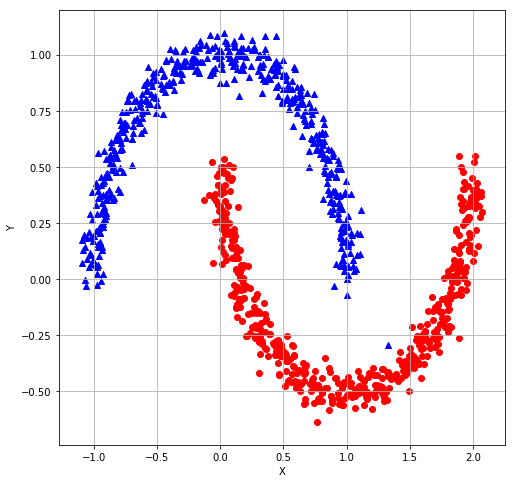

In [77]:
# Show clustered dataset
show_clustered_dataset(X, Y)

In [78]:
import numpy as np
import matplotlib.pyplot as plt
import warnings

from sklearn.datasets import make_moons
from sklearn.cluster import SpectralClustering


# For reproducibility
np.random.seed(1000)

nb_samples = 1000

In [79]:
def show_dataset(X, Y):
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))

    ax.grid()
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

    for i in range(nb_samples):
        if Y[i] == 0:
            ax.scatter(X[i, 0], X[i, 1], marker='o', color='r')
        else:
            ax.scatter(X[i, 0], X[i, 1], marker='^', color='b')

    plt.show()


def show_clustered_dataset(X, Y):
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))

    ax.grid()
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

    ax.scatter(X[Y == 1, 0], X[Y == 1, 1], marker='o', color='r')
    ax.scatter(X[Y == 0, 0], X[Y == 0, 1], marker='^', color='b')

plt.show()

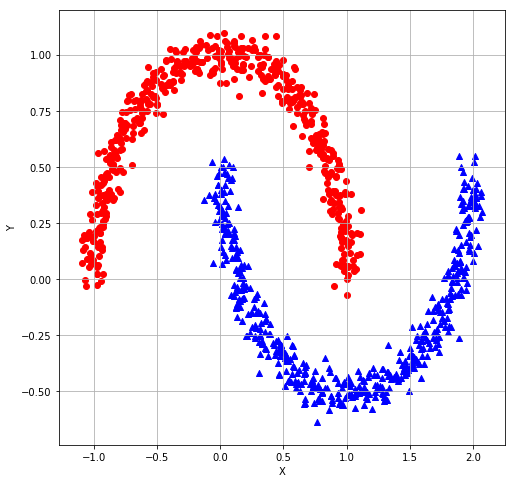

In [80]:
warnings.simplefilter("ignore")

# Create dataset
X, Y = make_moons(n_samples=nb_samples, noise=0.05)

# Show dataset
show_dataset(X, Y)

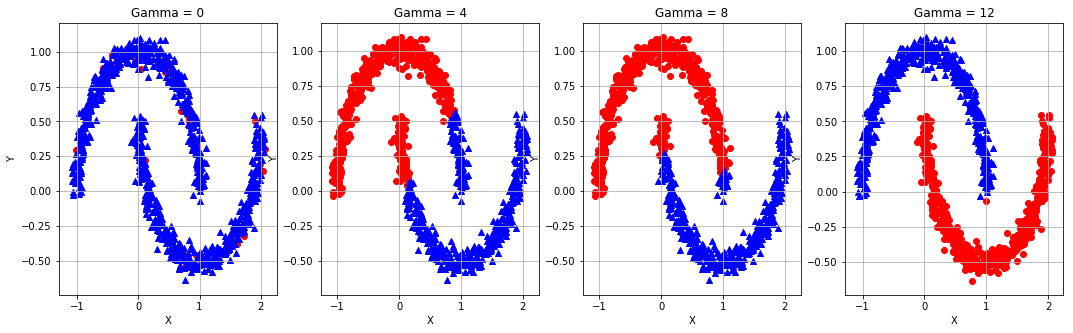

In [81]:
# Cluster the dataset for different gamma values
Yss = []
gammas = np.linspace(0, 12, 4)

for gamma in gammas:
    sc = SpectralClustering(n_clusters=2, affinity='rbf', gamma=gamma)
    Yss.append(sc.fit_predict(X))

# Show the result
# The colors can be inverted with respect to the figure in the book
fig, ax = plt.subplots(1, 4, figsize=(18, 5))

for i in range(4):
    ax[i].scatter(X[Yss[i] == 1, 0], X[Yss[i] == 1, 1], marker='o', color='r')
    ax[i].scatter(X[Yss[i] == 0, 0], X[Yss[i] == 0, 1], marker='^', color='b')
    ax[i].grid()
    ax[i].set_xlabel('X')
    ax[i].set_ylabel('Y')
    ax[i].set_title('Gamma = {}'.format(i * 4))

plt.show()

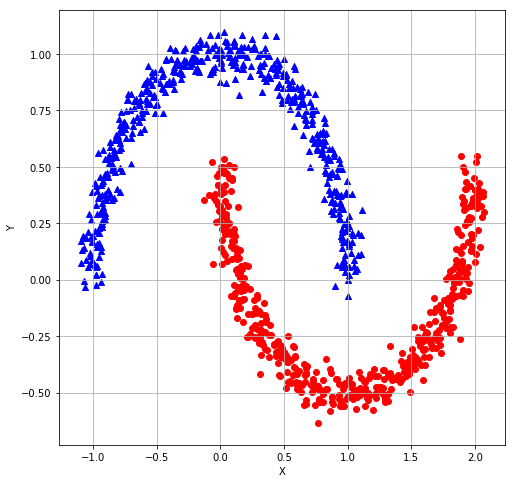

In [82]:
# Create and train Spectral Clustering
sc = SpectralClustering(n_clusters=2, affinity='nearest_neighbors')
Ys = sc.fit_predict(X)

# Show clustered dataset
show_clustered_dataset(X, Y)